In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib notebook

In [46]:
ro1=pd.read_csv("RO_1.csv")


In [62]:
ro1.head()

,Unnamed: 0,ASSET_NAME,DATE_TIME,ConcentrateFlowRate,DifferentialPressure,FeedConductivity,FeedFlowRate,FeedTemperature,FeedUVStatus,FeedpH,...,PreFilterPressure,PrimaryPressure,Recovery,Stage1CFDiffPressure,Stage1ConcentratePressure,TotalFeedFlow,TotalFeedFlowDaily,TotalPermeateFlow,TotalPermeateFlowDaily,TrainStep
0,326730,RO 1,2016-05-11 1:35,NaN,NaN,206.9239,NaN,NaN,2.0,NaN,...,NaN,NaN,NaN,NaN,145.3914,NaN,NaN,NaN,NaN,NaN
1,326731,RO 1,2016-05-11 1:55,NaN,NaN,242.6489,NaN,NaN,2.0,NaN,...,NaN,NaN,NaN,NaN,140.3565,NaN,NaN,NaN,NaN,NaN
2,326732,RO 1,2016-05-11 12:15,NaN,NaN,170.1782,NaN,NaN,2.0,NaN,...,NaN,NaN,NaN,NaN,137.3631,NaN,NaN,NaN,NaN,NaN
3,326733,RO 1,2016-05-11 12:20,NaN,NaN,249.7546,NaN,NaN,2.0,NaN,...,NaN,NaN,NaN,NaN,138.1090,NaN,NaN,NaN,NaN,NaN
4,326734,RO 1,2016-05-11 12:25,NaN,NaN,192.2020,NaN,NaN,2.0,NaN,...,NaN,NaN,NaN,NaN,136.9901,NaN,NaN,NaN,NaN,NaN


In [47]:
ro1_dp=ro1['DifferentialPressure'].dropna()

<IPython.core.display.Javascript object>


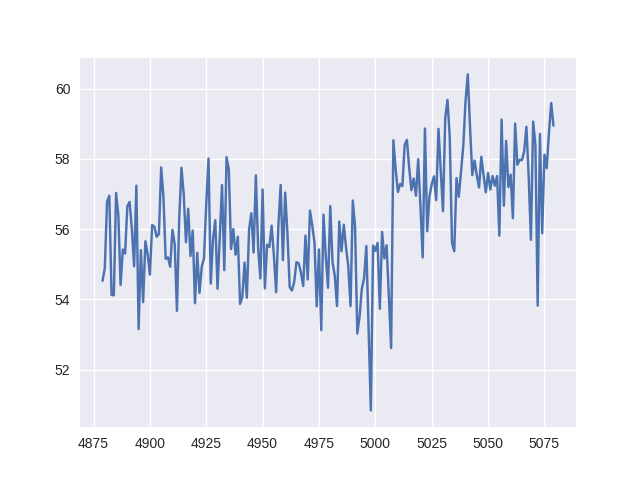

In [48]:
plt.figure(1)
plt.plot(ro1_dp[1:200])

In [49]:
# Import relevent functions for Keras
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [50]:
# for reproducibility
numpy.random.seed(123)

In [35]:
ro1_dp.head()

4878    55.7566
4879    54.5297
4880    54.8929
4881    56.7871
4882    56.9540
Name: DifferentialPressure, dtype: float64

In [51]:
#Normalize data
# normalize the dataset as ndataset
scaler = MinMaxScaler(feature_range=(0, 1))
ndataset = scaler.fit_transform(ro1_dp)

/home/datas/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/home/datas/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


In [52]:
# split into train and test sets
train_size = int(len(ndataset) * 0.67)
test_size = len(ndataset) - train_size
train, test = ndataset[0:train_size], ndataset[train_size:len(ndataset)]
print(len(train), len(test))

13400 6600


In [53]:
# Converting single data into two set of data considering one data depends on previous data
def ModData(data, ahd):
    dataX, dataY = [], []
    for i in range(len(data)-ahd): # ahd no of timestep ahead we want to go
        a = data[i]
        dataX.append(a)
        dataY.append(data[i + ahd])
    return numpy.array(dataX), numpy.array(dataY)

In [54]:
look_back = 1
trainX, trainY = ModData(train, look_back)
testX, testY = ModData(test, look_back)

In [13]:
trainX

array([ 0.69505105,  0.67889807,  0.68367984, ...,  0.63741956,
        0.62191433,  0.62734254])

In [55]:
# Reshaping the data to fit into Keras
np.random.seed(1234567)
trainX=np.reshape(trainX,len(trainX))
testX=np.reshape(testX,len(testX))

In [56]:
trainX

array([ 0.69505105,  0.67889807,  0.68367984, ...,  0.6375499 ,
        0.634061  ,  0.62398266])

In [57]:
#Fitting model

no_input=1
model = Sequential()
model.add(Dense(8, input_dim=no_input, activation='relu'))
model.add(Dense(8, init='normal', activation='relu'))
model.add(Dense(8, init='normal', activation='relu'))
model.add(Dense(8, init='normal', activation='relu'))
#model.add(Dense(6, init='normal', activation='sigmoid'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=5, batch_size=2, verbose=2)

/home/datas/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(8, activation="relu", kernel_initializer="normal")`
  
/home/datas/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(8, activation="relu", kernel_initializer="normal")`
  import sys
/home/datas/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(8, activation="relu", kernel_initializer="normal")`
  


Epoch 1/5
7s - loss: 0.0068
Epoch 2/5
5s - loss: 7.3979e-04
Epoch 3/5
5s - loss: 6.4571e-04
Epoch 4/5
6s - loss: 6.4396e-04
Epoch 5/5
5s - loss: 6.4077e-04


In [23]:
# Estimate model performance on normalized data
import math
trainScore = model.evaluate(trainX, trainY, verbose=0)
print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore, math.sqrt(trainScore)))
testScore = model.evaluate(testX, testY, verbose=0)
print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore, math.sqrt(testScore)))

Train Score: 0.00 MSE (0.02 RMSE)
Test Score: 0.00 MSE (0.02 RMSE)


In [58]:
# make predictions on normalized data
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert normalized data to standard format
ndataset=scaler.inverse_transform(ndataset)
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 1.89 RMSE
Test Score: 1.81 RMSE


/home/datas/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:374: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


In [59]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(ndataset)
trainPredictPlot[:] = numpy.nan
for i in range(len(trainPredict)):
    trainPredictPlot[look_back+i] = trainPredict[i]
    
    
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(ndataset)
testPredictPlot[:] = numpy.nan

for i in range(len(testPredict)):
    testPredictPlot[look_back+len(trainPredict)+i] = testPredict[i]



<IPython.core.display.Javascript object>


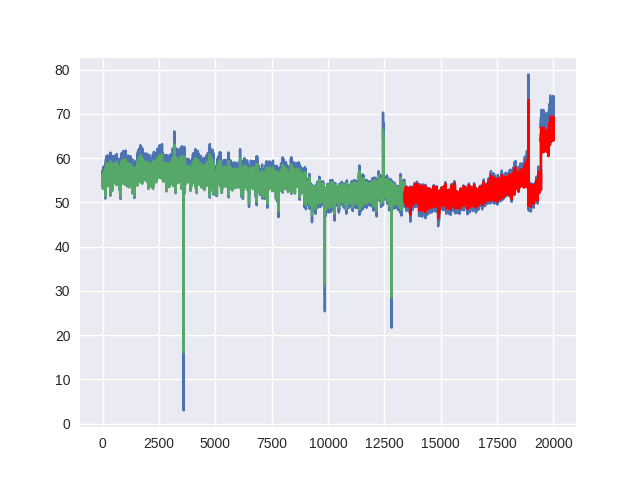

In [61]:
plt.figure(2)

# plot baseline and predictions
plt.plot(ndataset)
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot, color="red")
plt.show()